# Auswertung 200218_12

### imports

In [1]:
import sys
sys.path.append("../toolbox/")
from workflow  import *

In [2]:
%load_ext autoreload

In [3]:
%autoreload

## define master data

In [4]:
measurement_id = "200218_12"
campaign_id    = "02_Verifikation_1"
path_to_raw_data_folder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
path_to_hdf5_folder = "HDF5"

In [5]:
rawfolder, hdf5file = paths(measurement_id, campaign_id, path_to_raw_data_folder, path_to_hdf5_folder)

### import data

In [6]:
traceName = "Trace"
pulseMin = None
pulseMax = None


C1 = readChannel("C1", rawfolder, traceName, pulseMin, pulseMax)
C3 = readChannel("C3", rawfolder, traceName, pulseMin, pulseMax)

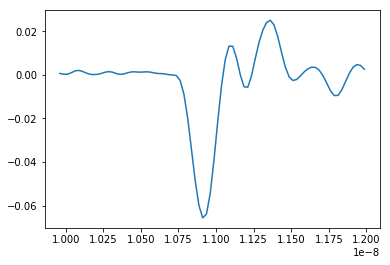

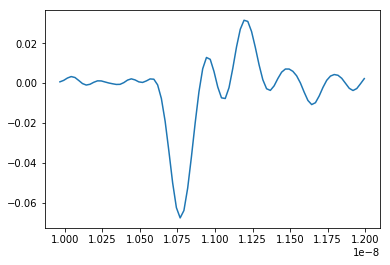

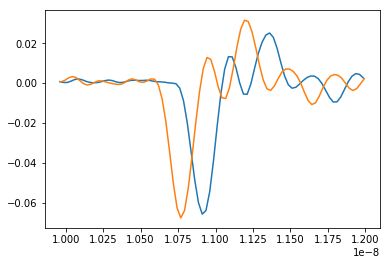

In [7]:
pulsnr = 123
viewImport(C1, C3, pulsnr)

### define area of interest

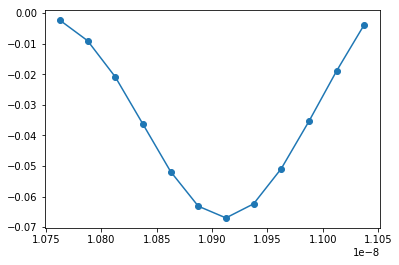

In [8]:
areaMinC1 = 32
areaMaxC1 = 44
pulsnr = 125

viewSelection(C1, pulsnr, areaMinC1, areaMaxC1)

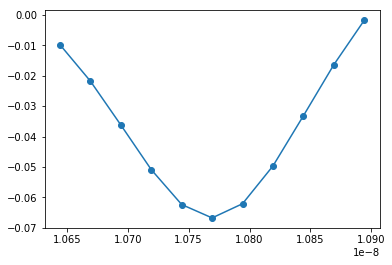

In [9]:
areaMinC3 = 27
areaMaxC3 = 38
pulsnr = 125

viewSelection(C3, pulsnr, areaMinC3, areaMaxC3)

## algorithm 1: fit gaussian function

In [10]:
# [A, mu, sigma]
gaussParamsC1 = [-1.5e-11, 1.09e-8, 5e-11]
gaussParamsC3 = [-1.0e-11, 1.07e-8, 5e-11]

In [11]:
C1["fit"] = fitChannel(C1["data"], areaMinC1, areaMaxC1, gaussParamsC1)

In [12]:
C3["fit"] = fitChannel(C3["data"], areaMinC3, areaMaxC3, gaussParamsC3)

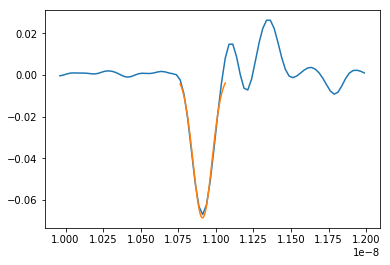

parameter: [-1.08546947e-11  1.09110147e-08  6.30775618e-11] [A, mu, sigma]


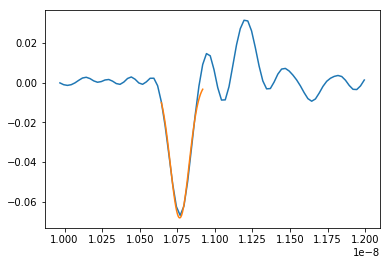

parameter: [-1.06380699e-11  1.07662435e-08  6.23670388e-11] [A, mu, sigma]


In [13]:
pulsnr = 125

viewFit(C1, pulsnr, areaMinC1, areaMaxC1, gaussParamsC1)
viewFit(C3, pulsnr, areaMinC3, areaMaxC3, gaussParamsC3)

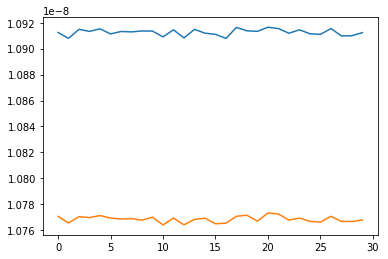

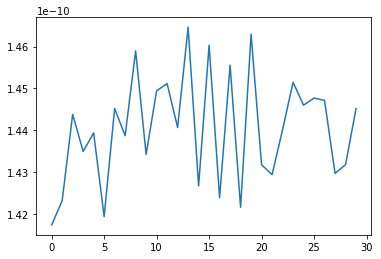

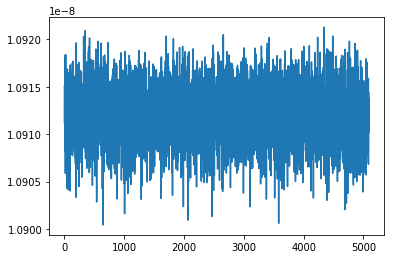

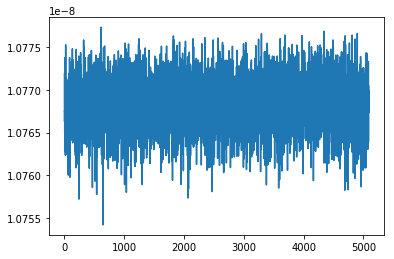

In [14]:
pulseMin = 100
pulseMax = 130

viewMu(C1, C3, pulseMin, pulseMax)

### histogram

In [15]:
JitterGauss = jitter(C1, C3, axis = 1)

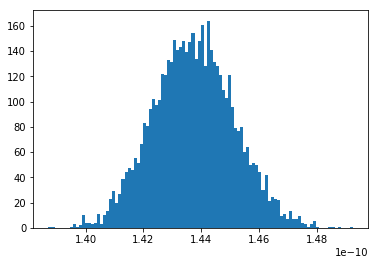

In [16]:
bins = 100

HistGauss = histogram(JitterGauss, bins)

### fit gauss to histogram

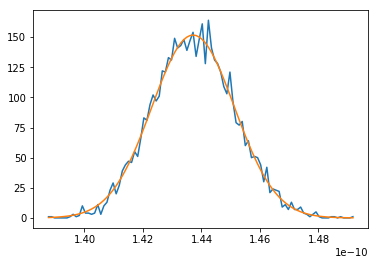

parameter: [5.36721221e-10 1.43714020e-10 1.41134548e-12] [A, mu, sigma]


In [17]:
# [A, mu, sigma]
gaussParamsHist = [1e-9, 1.5e-10, 1e-12]

HistFitParamsGauss = fitSingle(np.array([HistGauss[0], HistGauss[1]]), None, None, gaussParamsHist)

### result GAUSSFIT

In [18]:
DoubleJitter, SingleJitter, Mu = result(HistFitParamsGauss)

σ_0: 1.4113454796834493 ps
σ_1: 0.9979719592811476 ps
σ_1 = σ_0 / sqrt(2)

μ: 143.71402039934824 ps

coma separated [σ_0, σ_1, μ]
1.4113454796834492e-12,9.979719592811476e-13,1.4371402039934825e-10

 tab separated [σ_0, σ_1, μ]
1.4113454796834492e-12	9.979719592811476e-13	1.4371402039934825e-10


## algorithm 2: min

In [19]:
C1["min"] = minChannel(C1)
C3["min"] = minChannel(C3)

## algorithm 3: threshold

In [20]:
factor = 0.5

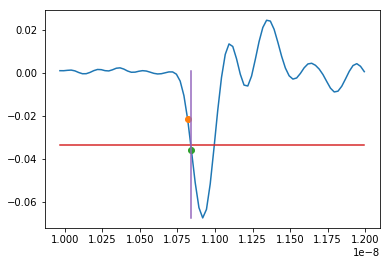

xt: 1.0839186310855442e-08 ps, yt -0.033823098350694636 ps


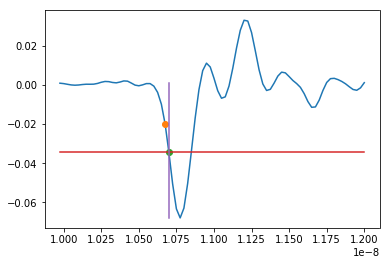

xt: 1.0699196841477812e-08 ps, yt -0.034029785929305945 ps


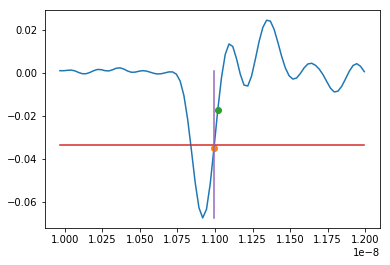

xt: 1.0995004221141927e-08 ps, yt -0.033823098350694636 ps


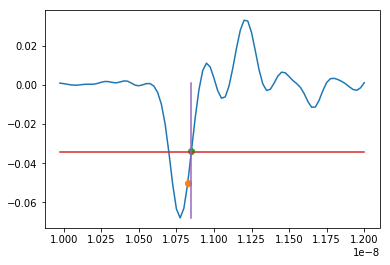

xt: 1.0849551263255021e-08 ps, yt -0.034029785929305945 ps


In [21]:
C1["thres5f"] = threshold(C1, factor, show=120)
C3["thres5f"] = threshold(C3, factor, show=120)
C1["thres5r"] = threshold(C1, factor, fallingEdge = False, show=120)
C3["thres5r"] = threshold(C3, factor, fallingEdge = False, show=120)

In [22]:
C1["thres5c"] = (C1["thres5r"] + C1["thres5f"]) / 2
C3["thres5c"] = (C3["thres5r"] + C3["thres5f"]) / 2

### histogram

In [23]:
JitterThres5f = jitter(C1, C3, storage = "thres5f", axis = 0)
JitterThres5c = jitter(C1, C3, storage = "thres5c", axis = 0)
JitterThres5r = jitter(C1, C3, storage = "thres5r", axis = 0)

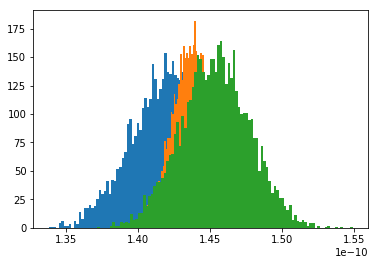

In [24]:
bins = 100

HistThres5f = histogram(JitterThres5f, bins)
HistThres5c = histogram(JitterThres5c, bins)
HistThres5r = histogram(JitterThres5r, bins)

### fit gauss to histogram

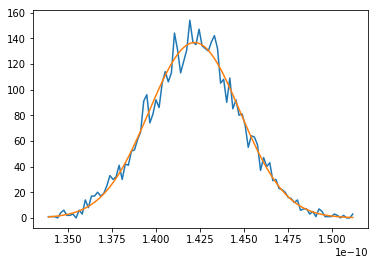

parameter: [8.87318290e-10 1.42188607e-10 2.59050713e-12] [A, mu, sigma]


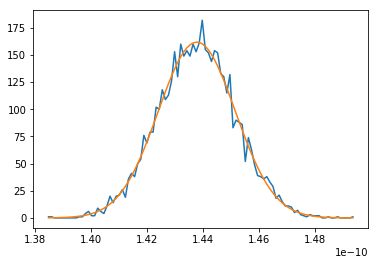

parameter: [5.57256121e-10 1.43772008e-10 1.37335008e-12] [A, mu, sigma]


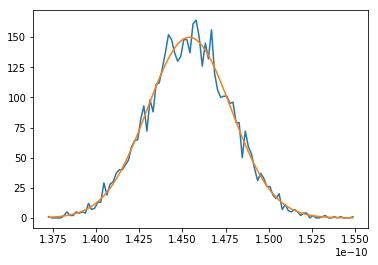

parameter: [9.06962071e-10 1.45390527e-10 2.41385335e-12] [A, mu, sigma]


In [25]:
# [A, mu, sigma]
gaussParamsThres5f = [1e-9, 1.47e-10, 1e-12]
gaussParamsThres5c = [1e-9, 1.5e-10, 1e-12]
gaussParamsThres5r = [1e-9, 1.53e-10, 1e-12]

HistFitParamsThres5f = fitSingle(np.array([HistThres5f[0], HistThres5f[1]]), None, None, gaussParamsThres5f)
HistFitParamsThres5c = fitSingle(np.array([HistThres5c[0], HistThres5c[1]]), None, None, gaussParamsThres5c)
HistFitParamsThres5r = fitSingle(np.array([HistThres5r[0], HistThres5r[1]]), None, None, gaussParamsThres5r)

### result

In [26]:
print("-- THRESHOLD 50% FALLING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5f)

print("\n--------------------------\n\n-- THRESHOLD 50% CENTER --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5c)

print("\n-------------------------------\n\n-- THRESHOLD 50% RISING EDGE --")
DoubleJitter, SingleJitter, Mu = result(HistFitParamsThres5r)

-- THRESHOLD 50% FALLING EDGE --
σ_0: 2.5905071334862377 ps
σ_1: 1.8317651608002437 ps
σ_1 = σ_0 / sqrt(2)

μ: 142.18860704380495 ps

coma separated [σ_0, σ_1, μ]
2.5905071334862377e-12,1.8317651608002436e-12,1.4218860704380496e-10

 tab separated [σ_0, σ_1, μ]
2.5905071334862377e-12	1.8317651608002436e-12	1.4218860704380496e-10

--------------------------

-- THRESHOLD 50% CENTER --
σ_0: 1.3733500761818893 ps
σ_1: 0.9711051518112754 ps
σ_1 = σ_0 / sqrt(2)

μ: 143.77200790983042 ps

coma separated [σ_0, σ_1, μ]
1.3733500761818893e-12,9.711051518112754e-13,1.4377200790983042e-10

 tab separated [σ_0, σ_1, μ]
1.3733500761818893e-12	9.711051518112754e-13	1.4377200790983042e-10

-------------------------------

-- THRESHOLD 50% RISING EDGE --
σ_0: 2.4138533485352243 ps
σ_1: 1.7068520715391116 ps
σ_1 = σ_0 / sqrt(2)

μ: 145.39052654662848 ps

coma separated [σ_0, σ_1, μ]
2.413853348535224e-12,1.7068520715391116e-12,1.4539052654662849e-10

 tab separated [σ_0, σ_1, μ]
2.413853348535224e-12	1